# Ön Bilgi
**Geliştiren :** Onur Kantar - Ömer Resul Ertan

**Veri Kümesinin İçeriği :** 

**Tweet Sınıfları :** 

-

**Veri Kümesi Referansı :** 

**Algoritma :** Naive Bayes (NB)

**Ağ Mimarisi :** 


**batch_size :** 

**epochs :** 

**Doğruluk Oranı :** %100


---



In [1]:
import pandas as pd                     
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
tweets = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Sets/hurriyet.csv", sep=';', encoding="ISO-8859–9")
tweets.drop(['ItemID'], axis=1)

,Sentiment,SentimentText
0,1,abd deki türk mağazasına soygun girişimi abd ...
1,1,ajanlar ünlü yazarı bile şaşırttı yazdığı ca...
2,1,mel gibson ın şok eden ses kaydı mel gibson ı...
3,1,türkiye avrupa hedefini teyit etti italya n...
4,1,100 yıllık doğalgaz rezervi bulundu haaretz g...
...,...,...
5995,6,kadıköy adliyesi nin emektarlarına plaket kad...
5996,6,tümörü alındı ikizine kavuştu ebrar ve eslem ...
5997,6,tasarı kabul edildi elektronik tebligat dönem...
5998,6,yaşlı kadının acı sonu gültepe yaşar kemal ma...


# Veri Kümemizi Düzenleyelim : 

---



### NULL Değerleri Silme İşlemi : 

In [3]:
tweets.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [4]:
tweets = tweets.dropna().reset_index(drop=True)
tweets.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

### Gereksiz Kelimeleri - Boşukları - İşaretleri Silme İşlemleri :  

In [5]:
nltk.download('stopwords')
stop_word_list = stopwords.words('turkish')
stop_word_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [6]:
def preprocess_text(sen):
    
    # Sayıları Silme İşlemi
    sentence = re.sub('[\d\s]', ' ', str(sen))

    # Noktalama İşaretlerini Silme İşlemi
    sentence = re.sub('[^\w\s]', ' ', str(sentence))
    
    # Tek Karakterleri Silme İşlemi
    sentence = re.sub(r"\b[\w\s]\b", ' ',str(sentence))
    
    # Birden Çok Boşluğu Silme İşlemi
    sentence = re.sub(r'\s+', ' ', sentence)
        
    # Engellenecek Kelimeleri Silme İşlemi
    WPT = nltk.WordPunctTokenizer()
    tokens = WPT.tokenize(sentence)
    filtered_tokens = [token for token in tokens if token not in stop_word_list]
    single_doc = ' '.join(filtered_tokens)
    
    # Tüm Harfler Küçük Harfe Dönüştürülüyor
    return single_doc.lower()

In [7]:
x = tweets['SentimentText']
y = tweets['Sentiment']

In [8]:
x = x.apply(preprocess_text)
pd.DataFrame(data=x)

,SentimentText
0,abd deki türk mağazasına soygun girişimi abd n...
1,ajanlar ünlü yazarı bile şaşırttı yazdığı casu...
2,mel gibson ın şok eden ses kaydı mel gibson ın...
3,türkiye avrupa hedefini teyit etti italya nın ...
4,yıllık doğalgaz rezervi bulundu haaretz gazete...
...,...
5995,kadıköy adliyesi nin emektarlarına plaket kadı...
5996,tümörü alındı ikizine kavuştu ebrar eslem adlı...
5997,tasarı kabul edildi elektronik tebligat dönemi...
5998,yaşlı kadının acı sonu gültepe yaşar kemal mah...


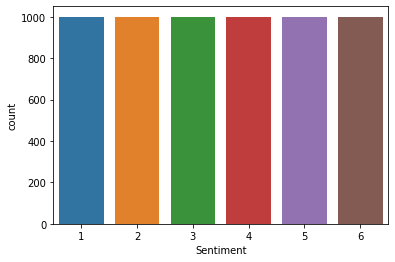

In [9]:
sns.countplot(y)

# X Verilerine Vektörlere Çevirelim

---


In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase = True)
x = vectorizer.fit_transform(x)

# Y Verilerimizi One Hot Encoding Uygulamamız Gerekiyor :  


---


**One Hot Encoding Nedir?**

One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. Bu işlem, ağın model için problemi daha kolay hale getirmesine yardımcı olabilir. 


- Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir.
- Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışındaki tüm değerleri   sıfır  olan bir ikili vektör olarak temsil edilir.

In [11]:
pd.DataFrame(y).sample(5)

,Sentiment
3878,4
2574,3
438,1
1735,2
5727,6


In [12]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
pd.DataFrame(y).sample(5)

,0
1007,1
1858,1
3021,3
3827,3
4925,4


In [13]:
#y = to_categorical(y)
#pd.DataFrame(y).sample(5)

# Train ve Test İşlemleri İçin Ayrımı Gerçekleştirelim : 

---


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
print('x Train : ' + str(x_train.shape))
print('x Test : ' + str(x_test.shape))
print('y Train : ' + str(y_train.shape))
print('y Test : ' + str(y_test.shape))

x Train : (4800, 88163)
x Test : (1200, 88163)
y Train : (4800,)
y Test : (1200,)


# Eğitime Başlayalım

---


In [16]:

# GaussianNB sınıfından bir nesne ürettik
model = GaussianNB()

# Makineyi eğitiyoruz
model.fit(X=x_train.toarray(), y = y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
accuracy_score(y_test,model.predict(x_test.toarray()))


0.7225

# Sonuçları Değerlendirelim

---


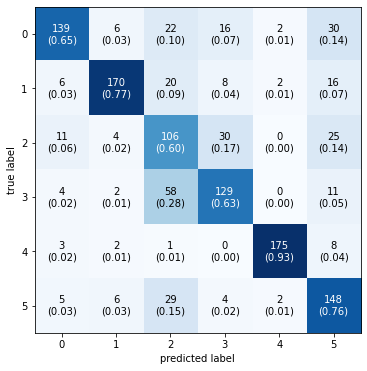

In [21]:
y_pred = model.predict(x_test.toarray())

"""y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
"""
cm = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat = cm,
                                show_normed = True,
                                figsize = (6,6))